## Bayesian Optimization

- The utility function being used here is Upper Confidence Bound(UCB)
- This function has a free parameter k that allows the user to make the algorithm more or less conservative
- The larger the initial set of random points explored, the lesss likely the algorithm is to get stuck in local minima due to being too conservative

[Reference](https://github.com/bayesian-optimization/BayesianOptimization/blob/master/examples/visualization.ipynb)

In [1]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [7]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

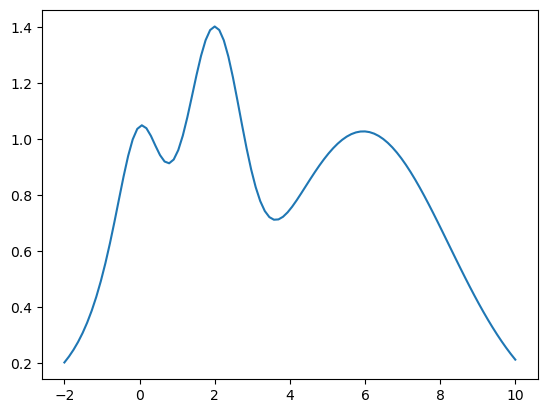

In [20]:
x = np.linspace(-2, 10, 100).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

In [15]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)

In [16]:
acq_function = UtilityFunction(kind="ucb", kappa=5) # higher k higher exploration
optimizer.maximize(init_points=2, n_iter=0, acquisition_function = acq_function) 

|   iter    |  target   |     x     |
-------------------------------------
| 1         | 0.8198    | 3.109     |
| 2         | 0.746     | 7.775     |


In [23]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

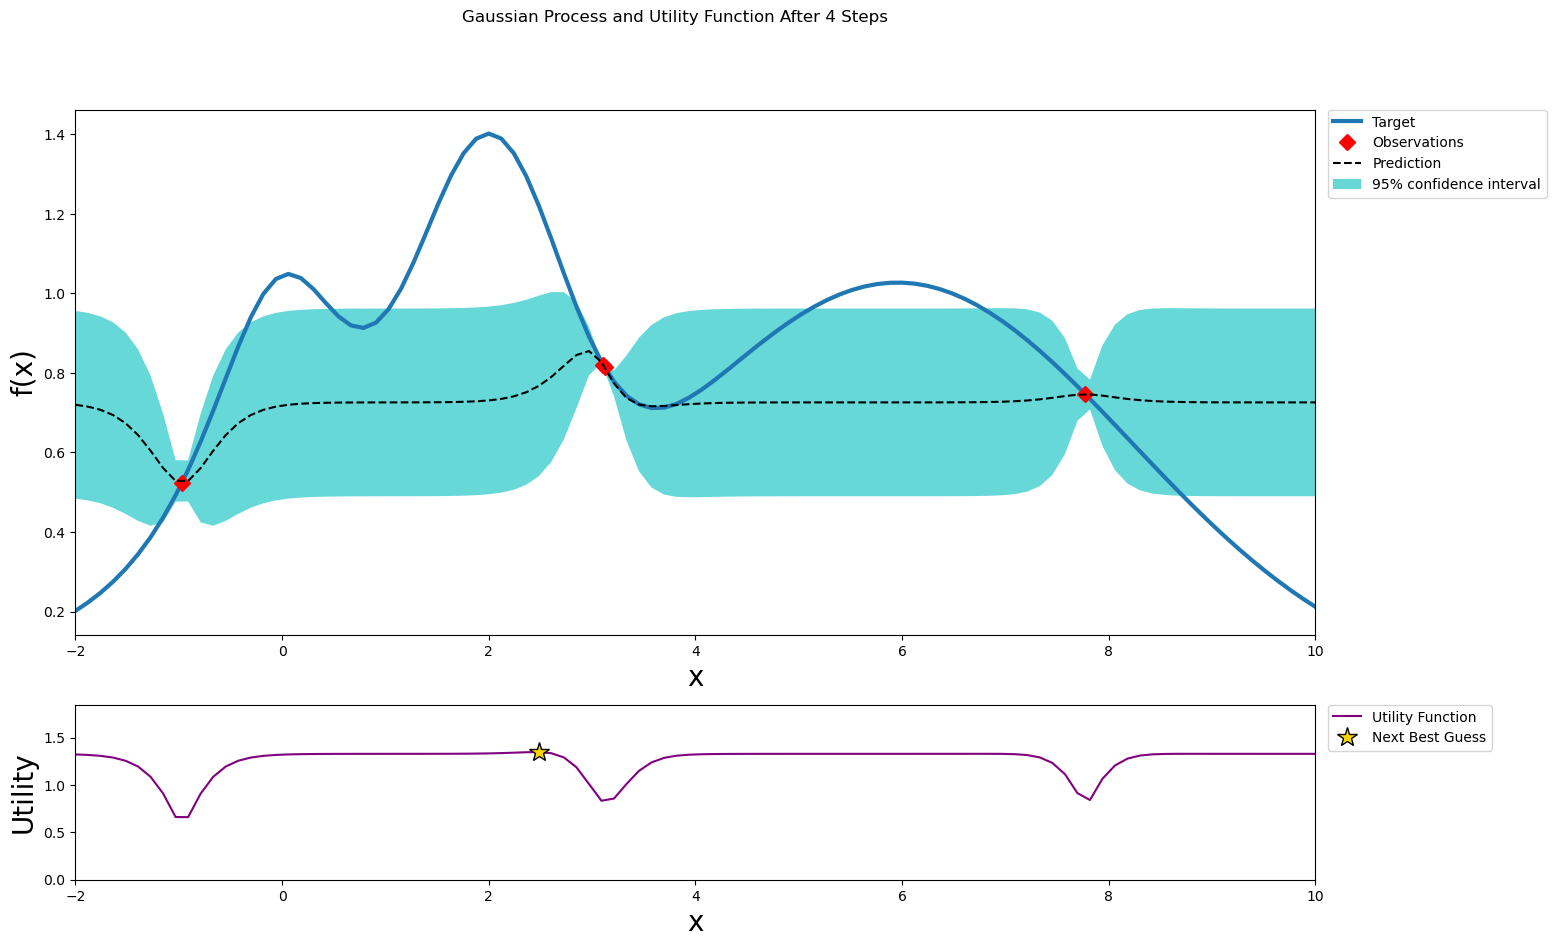

In [24]:
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 5         | 1.136     | 2.607     |


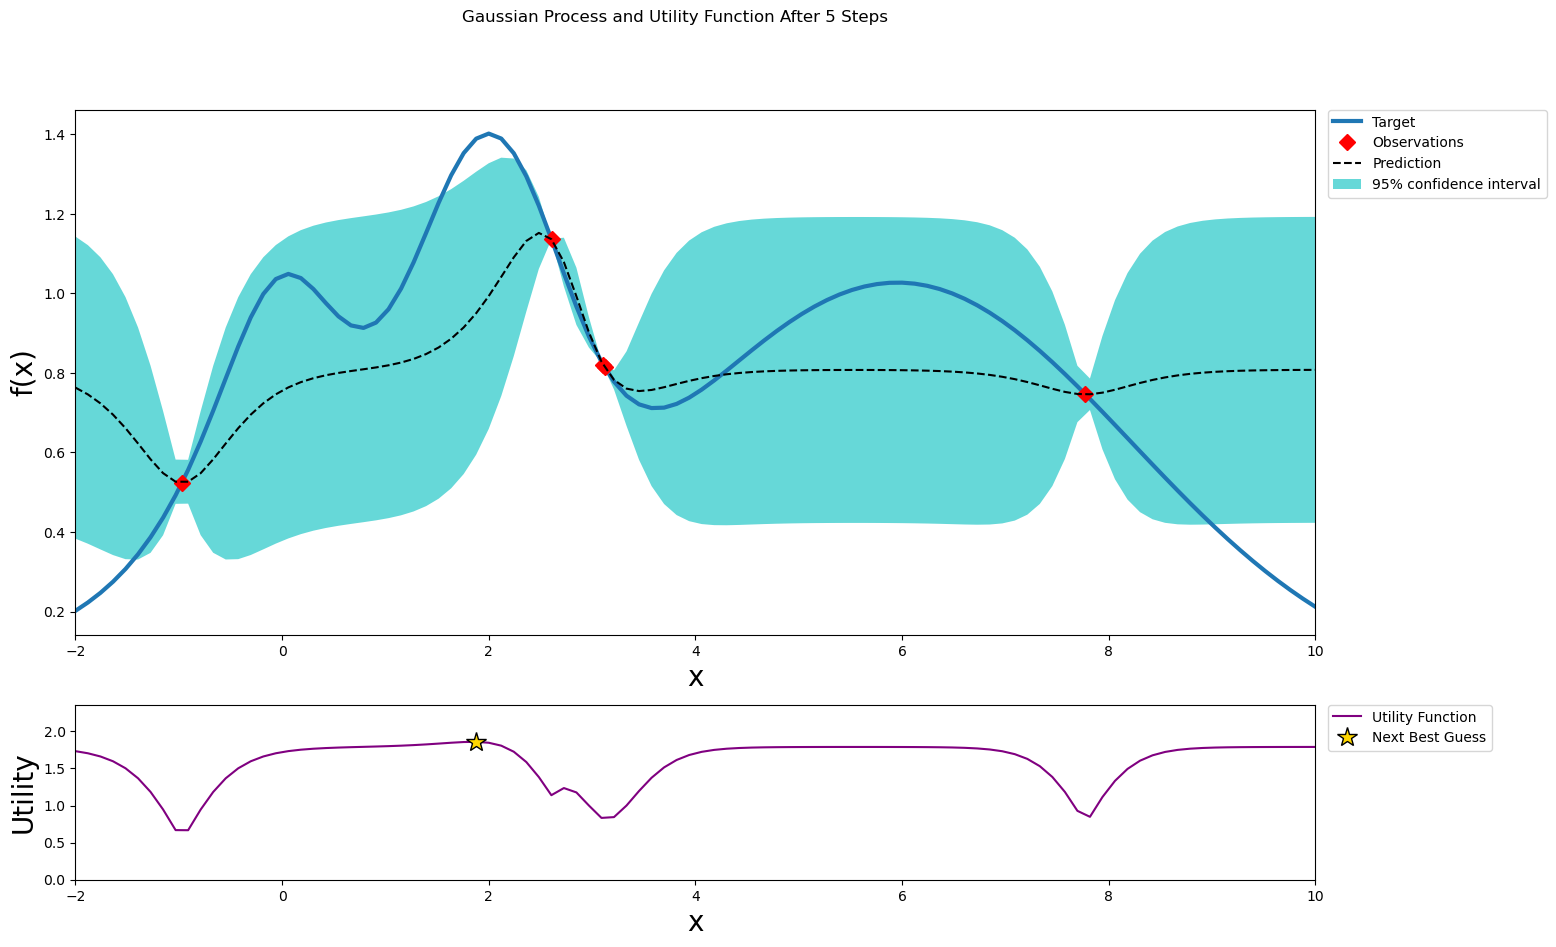

In [25]:
optimizer.maximize(init_points=0, n_iter=1)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 6         | 1.383     | 1.851     |


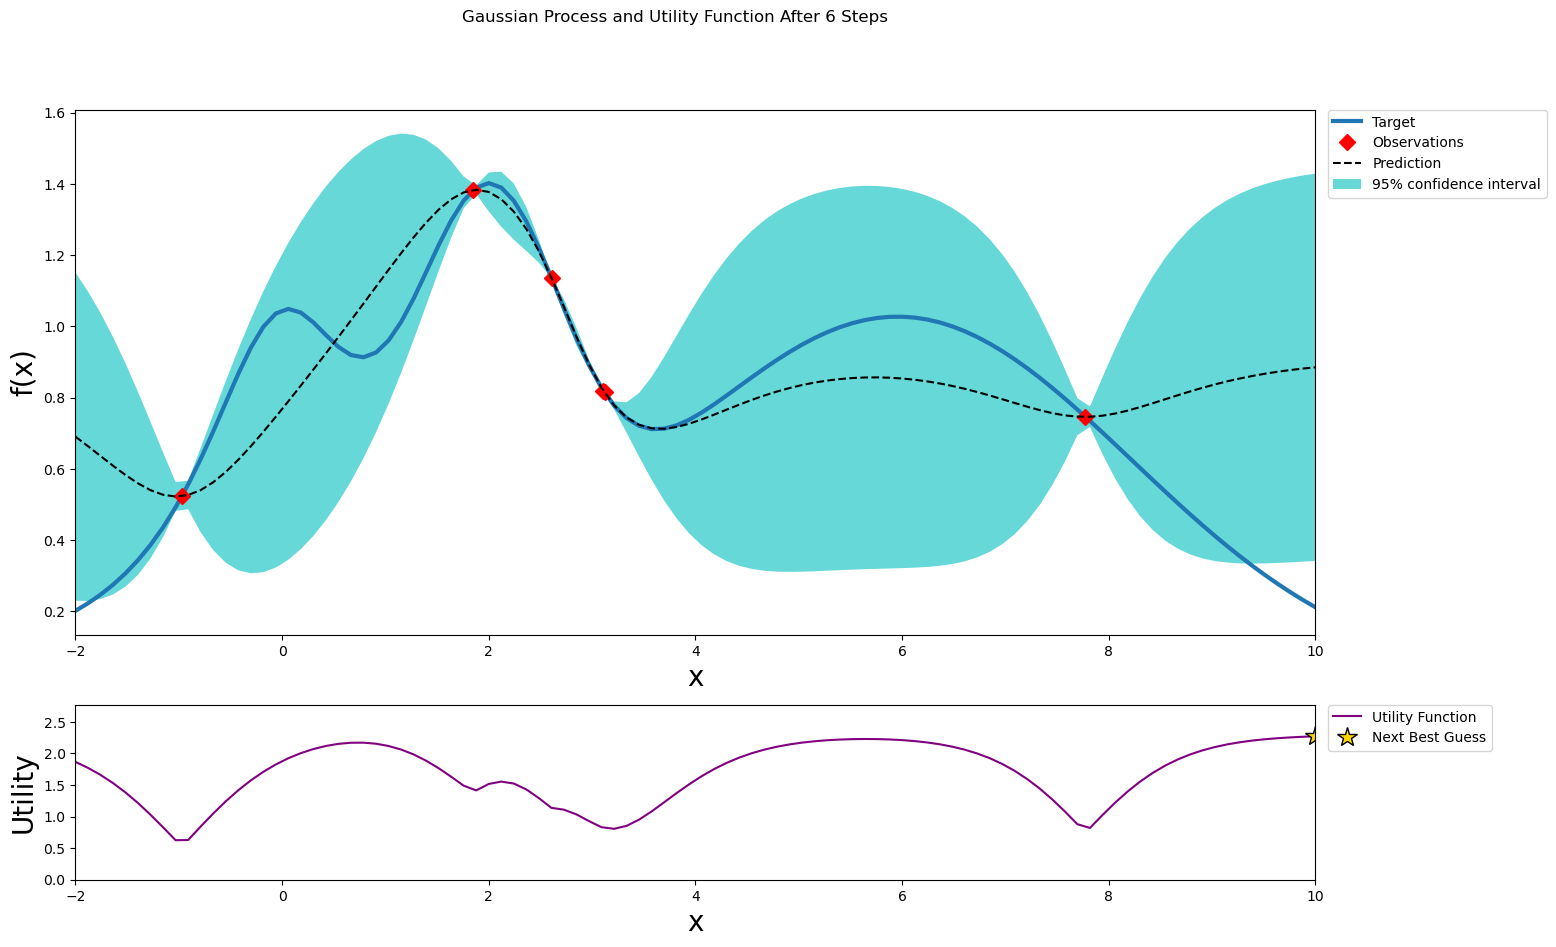

In [26]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 7         | 0.2118    | 10.0      |


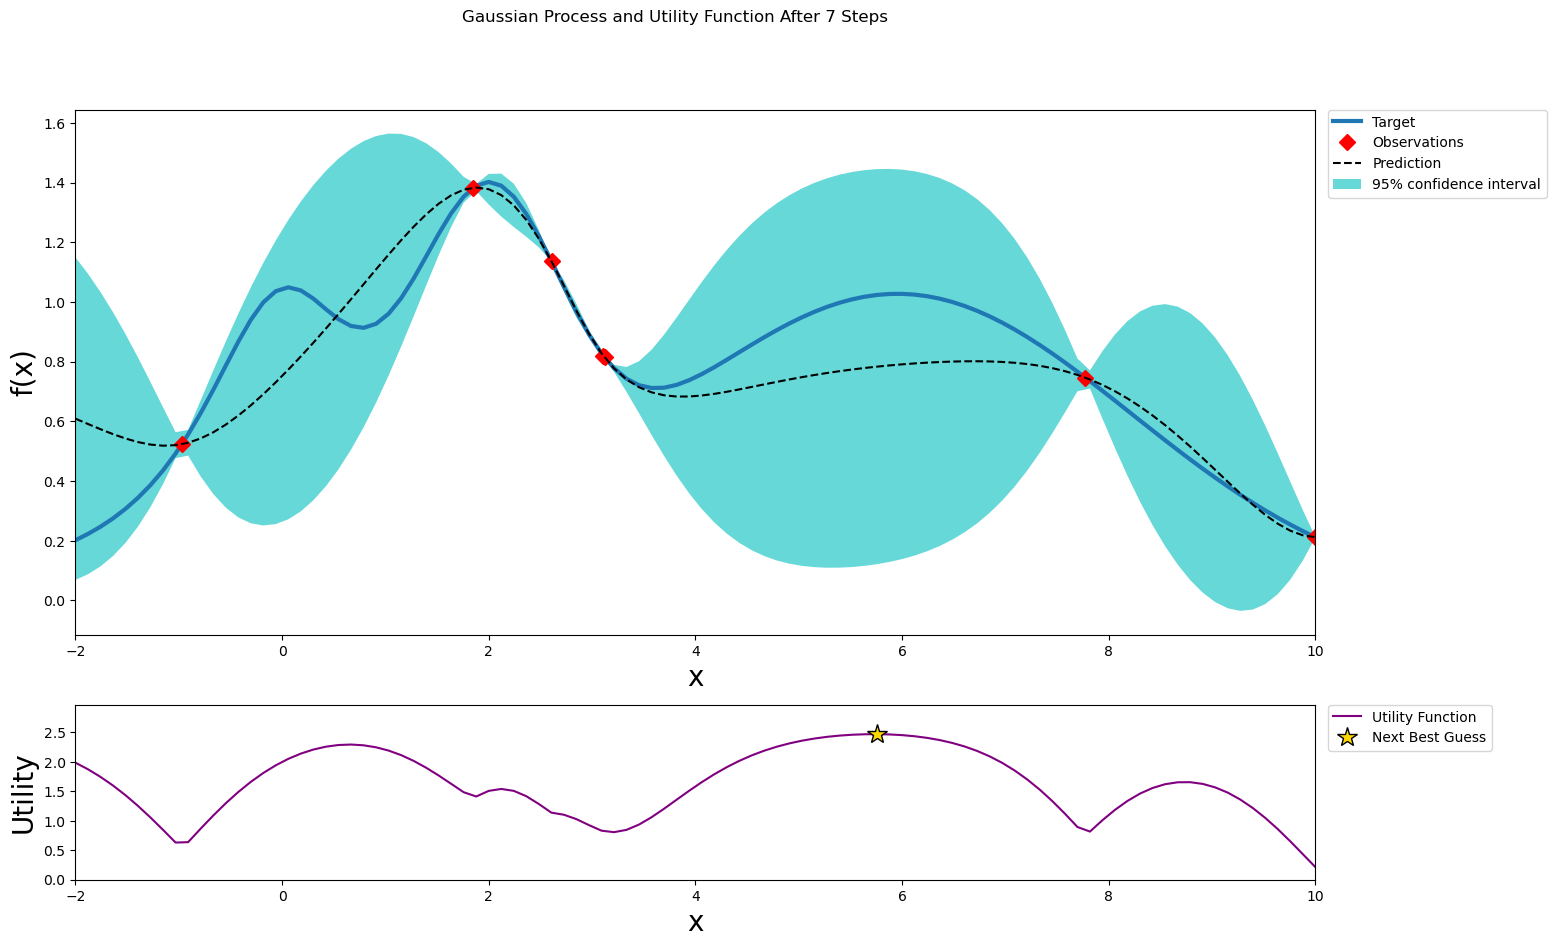

In [27]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 8         | 1.022     | 5.731     |


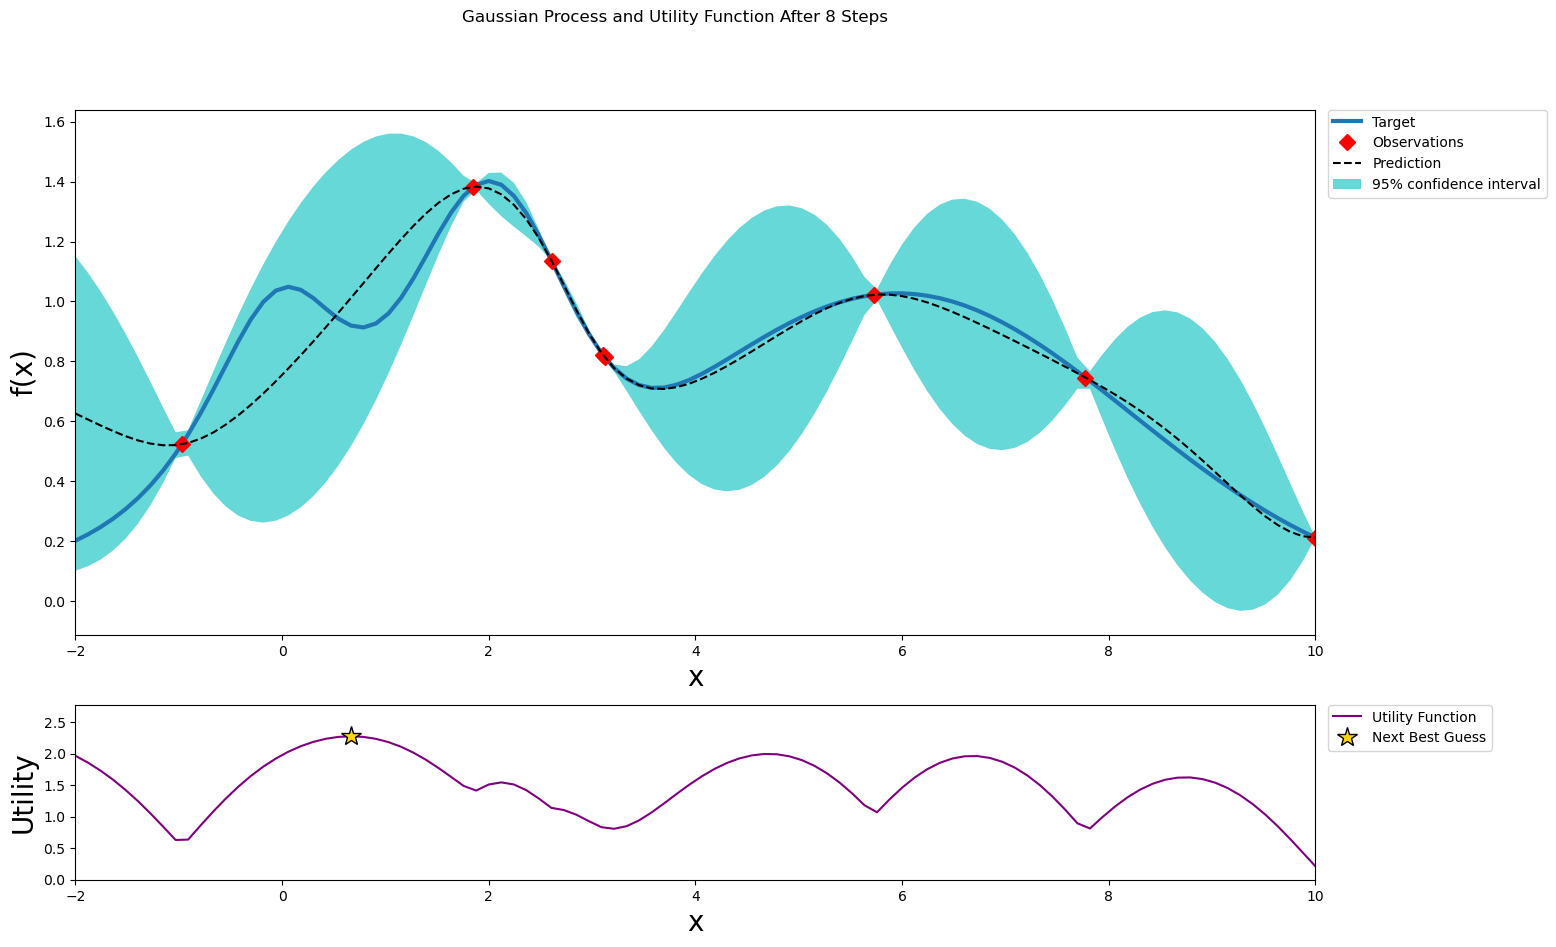

In [28]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 9         | 0.9195    | 0.6665    |


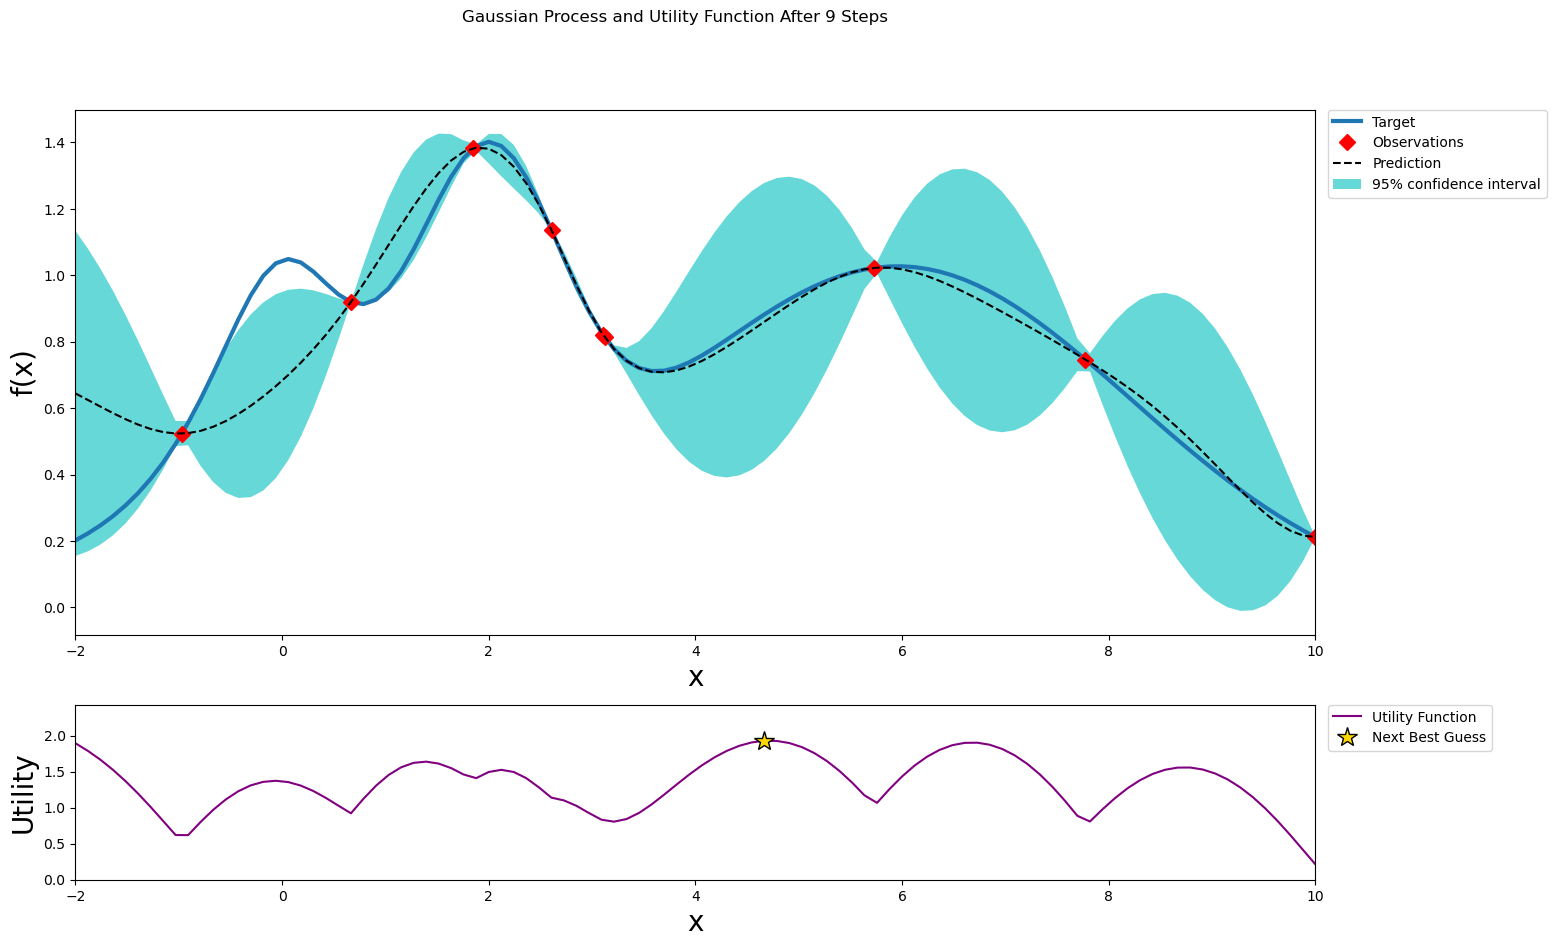

In [29]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 10        | 0.8914    | 4.715     |


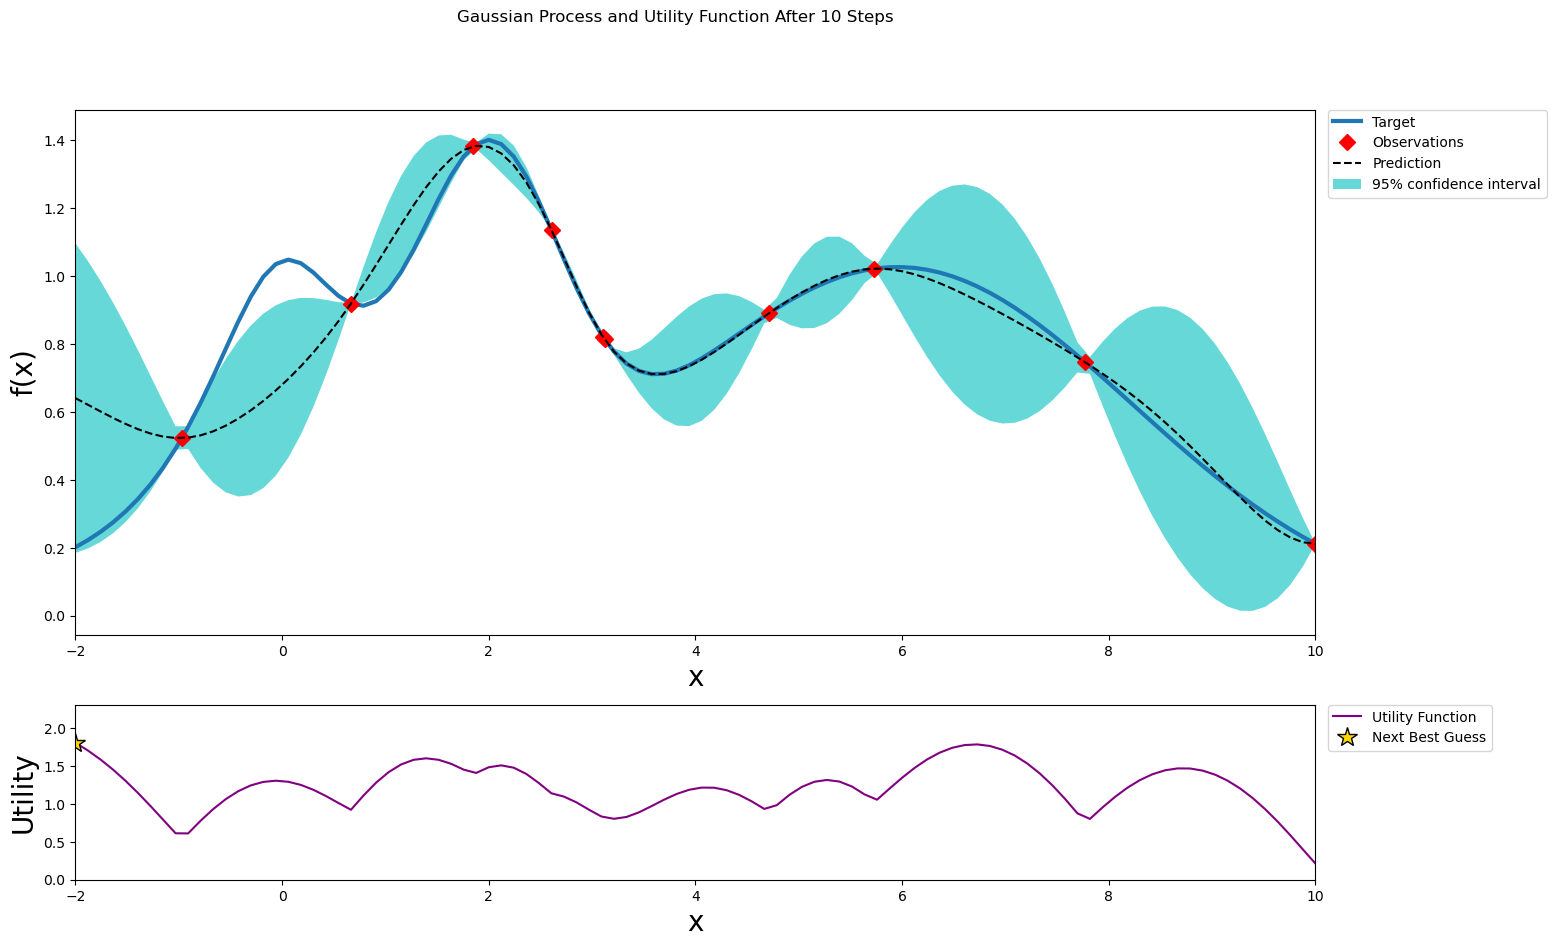

In [30]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 11        | 0.2017    | -2.0      |


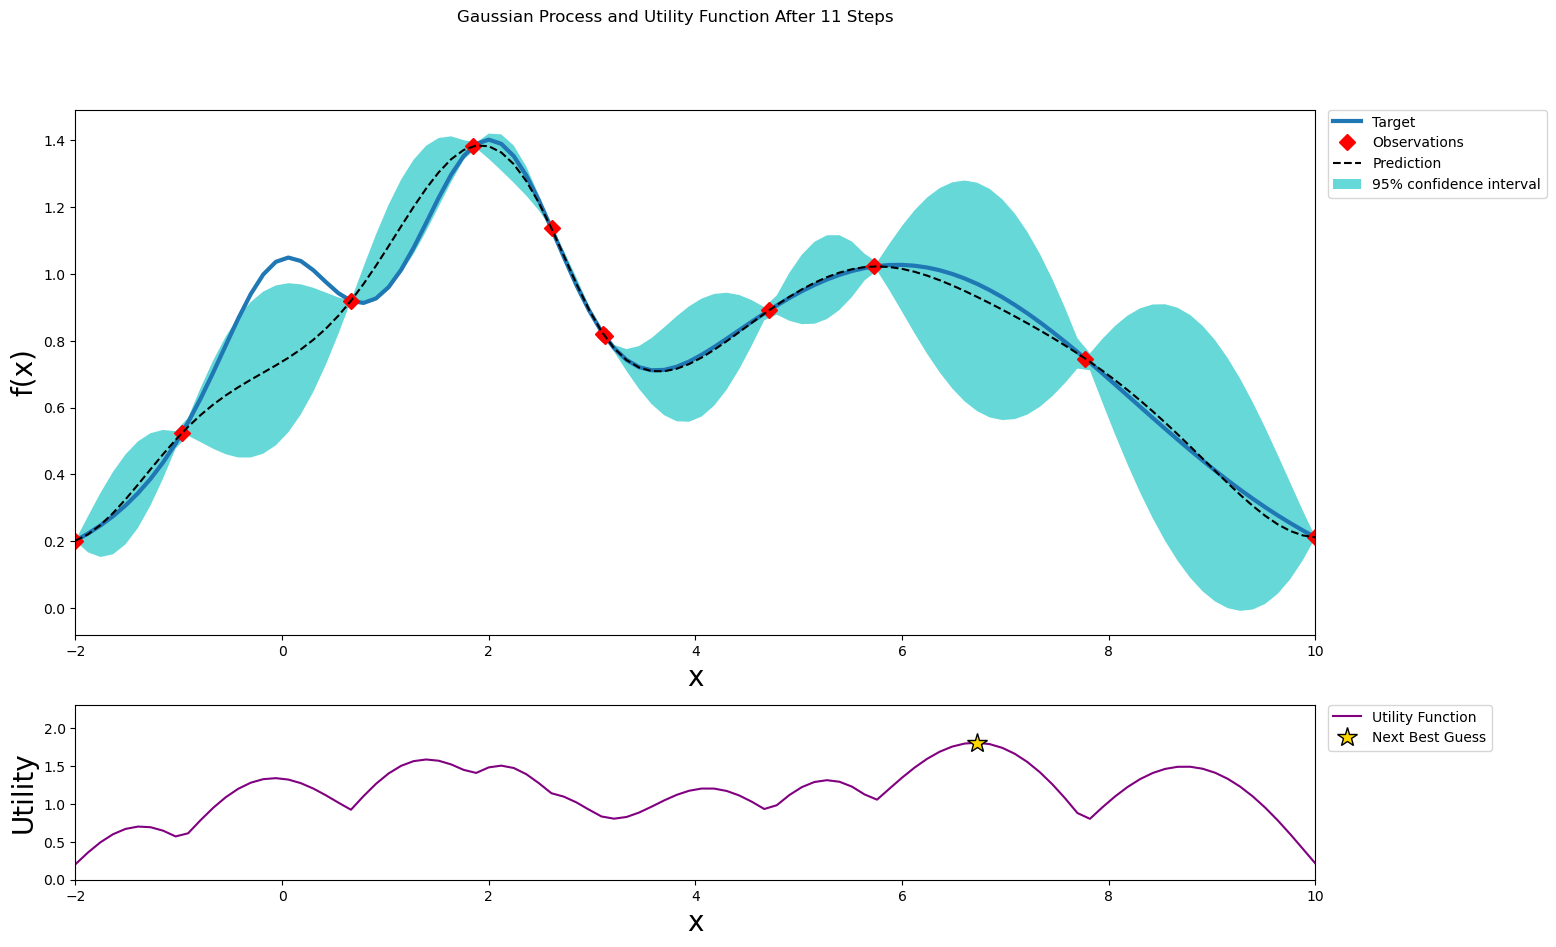

In [31]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 12        | 0.9723    | 6.712     |


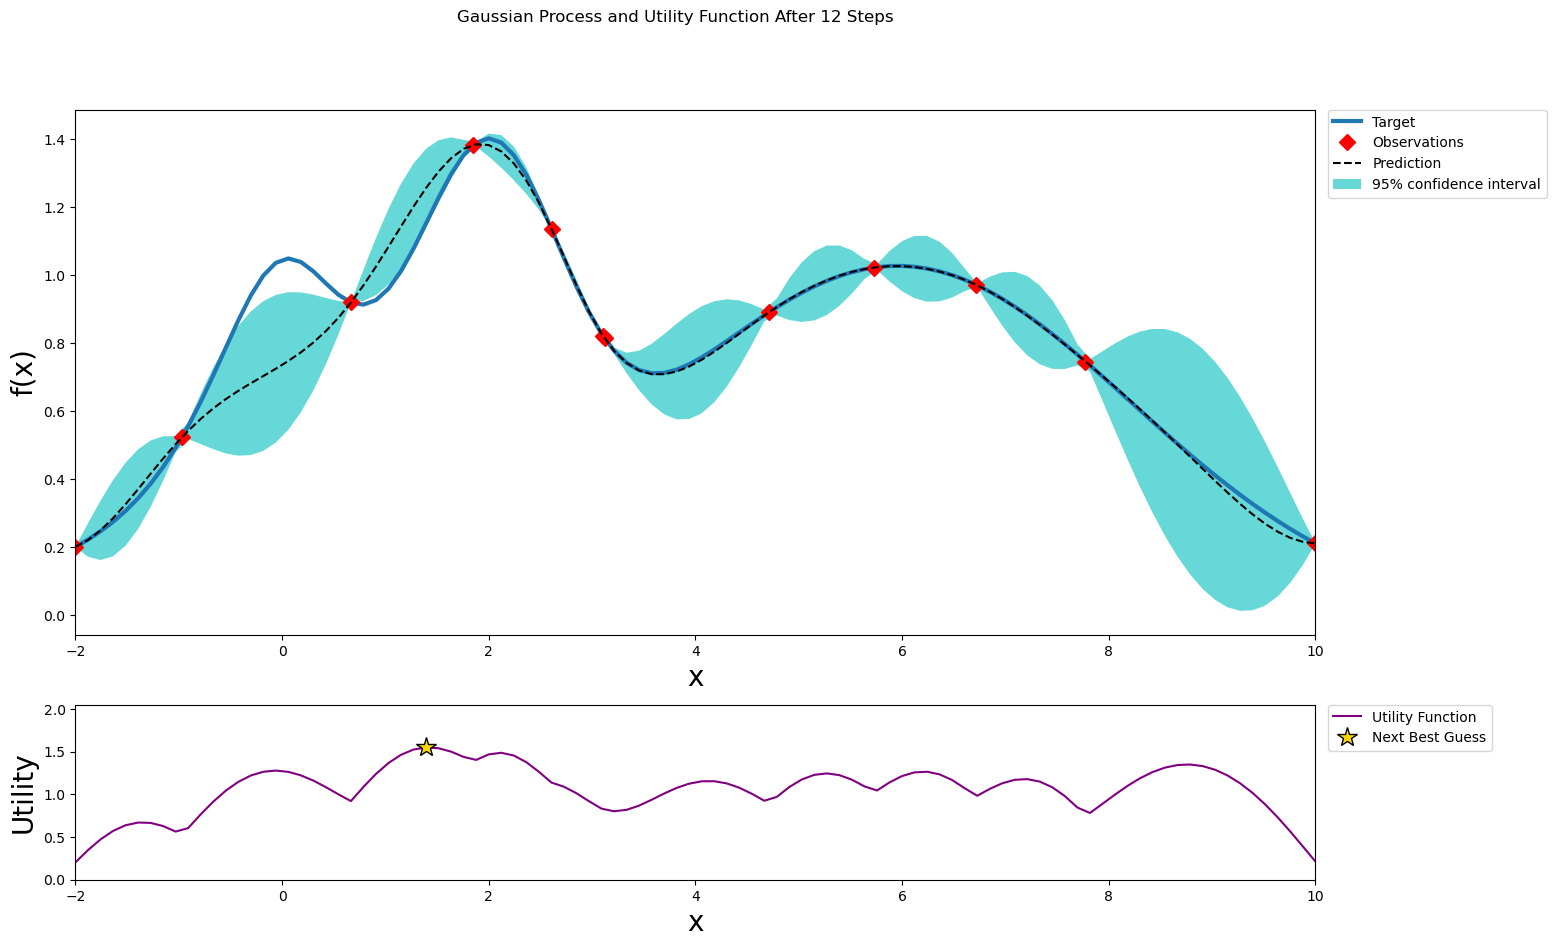

In [32]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 13        | 1.167     | 1.418     |


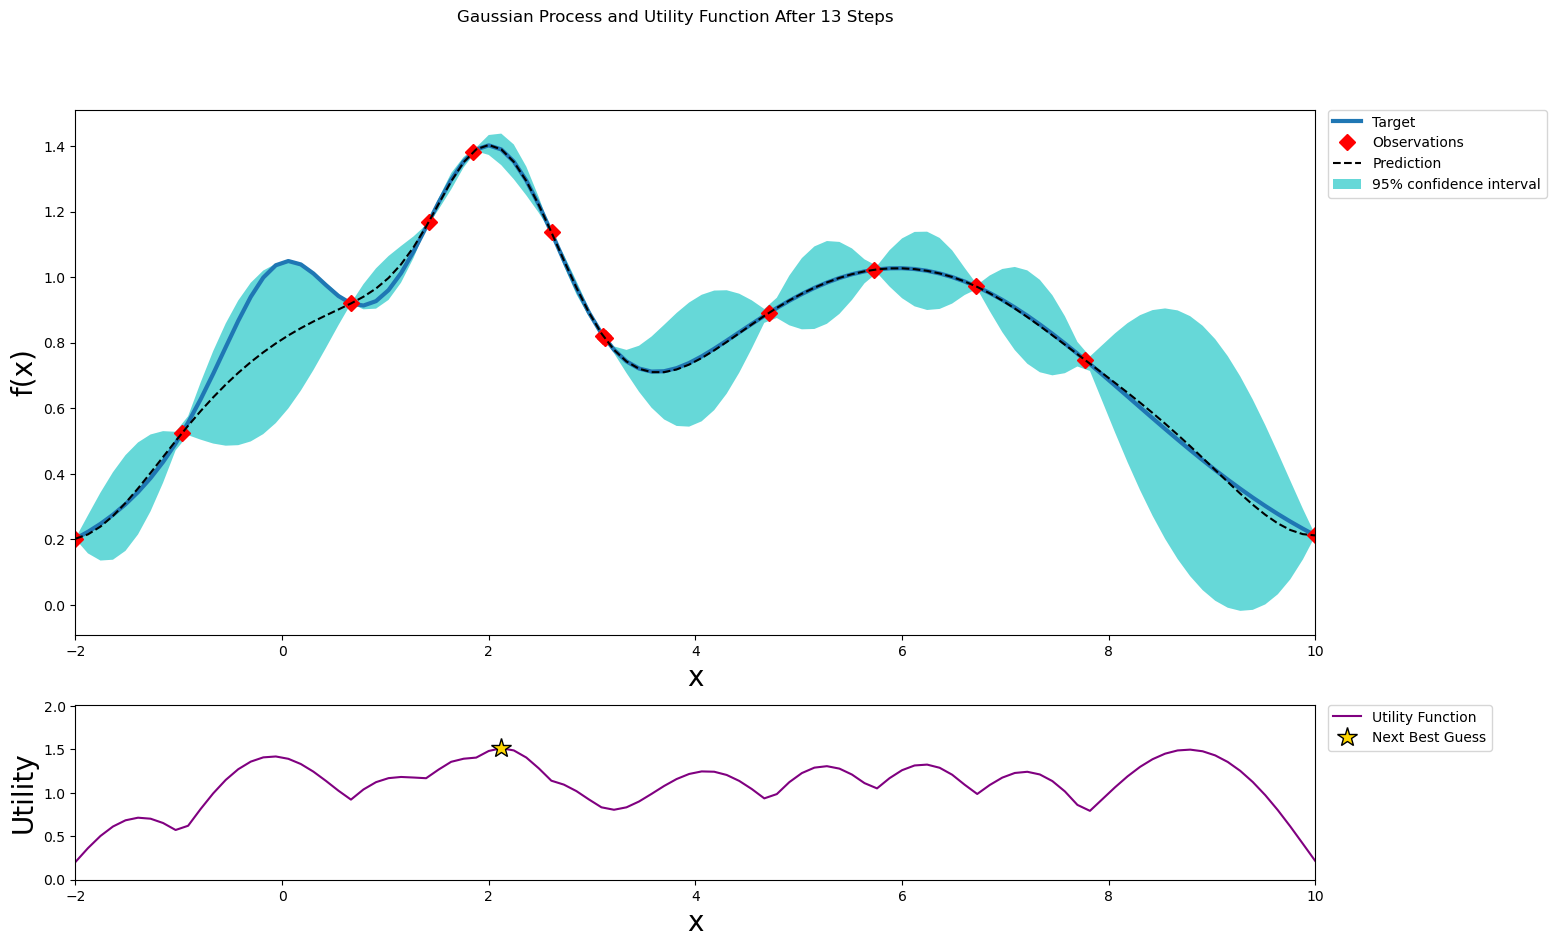

In [33]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 14        | 1.387     | 2.13      |


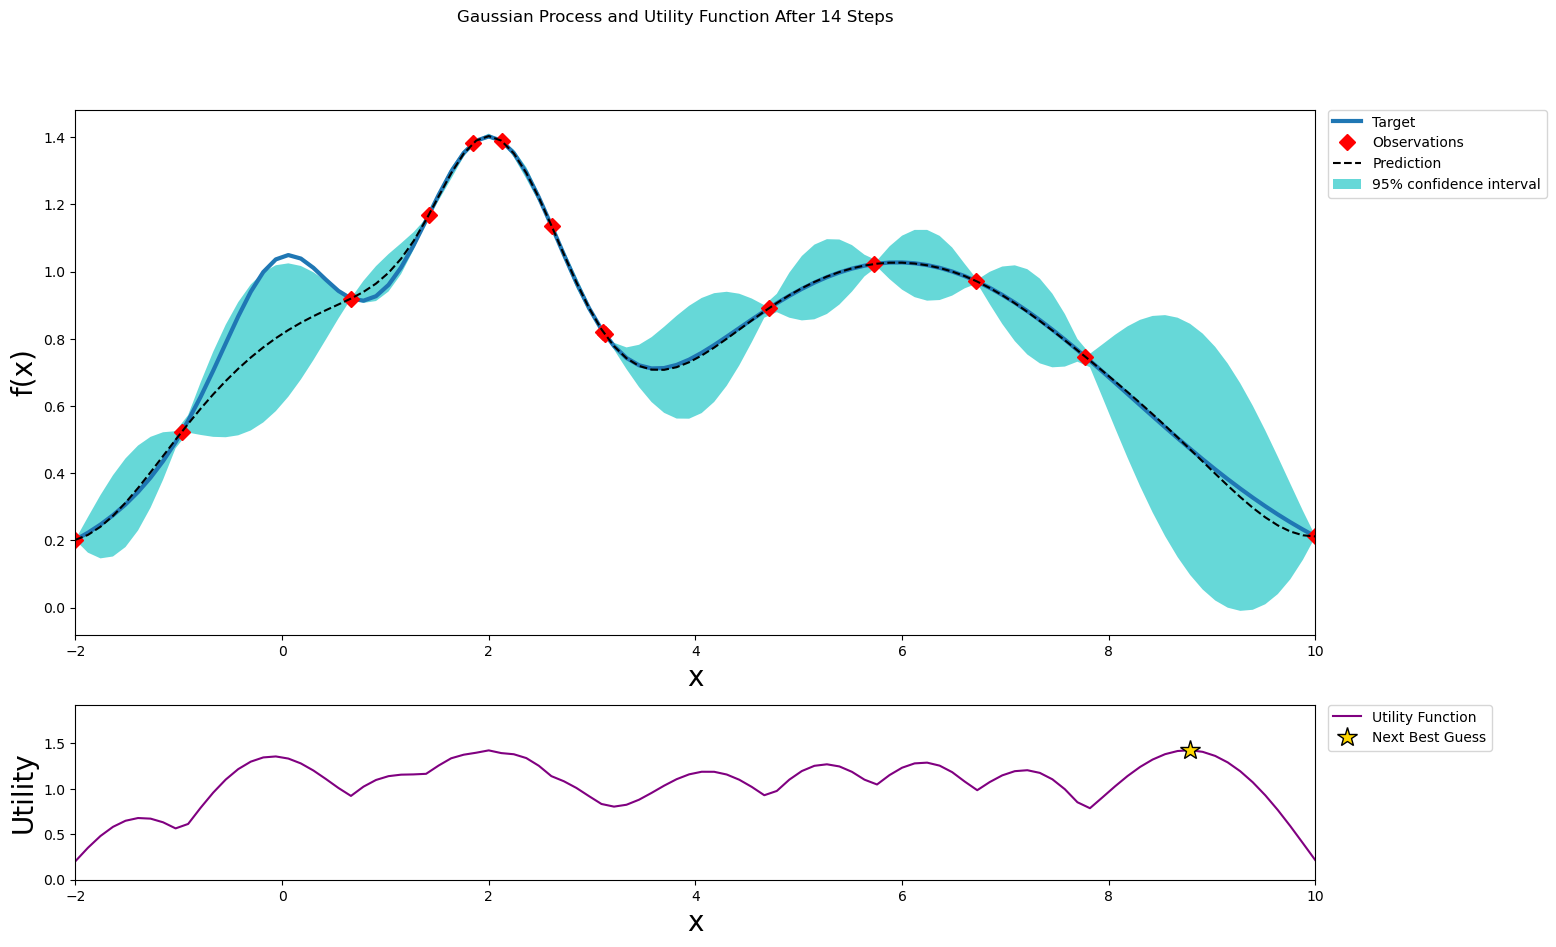

In [34]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 15        | 0.4777    | 8.768     |


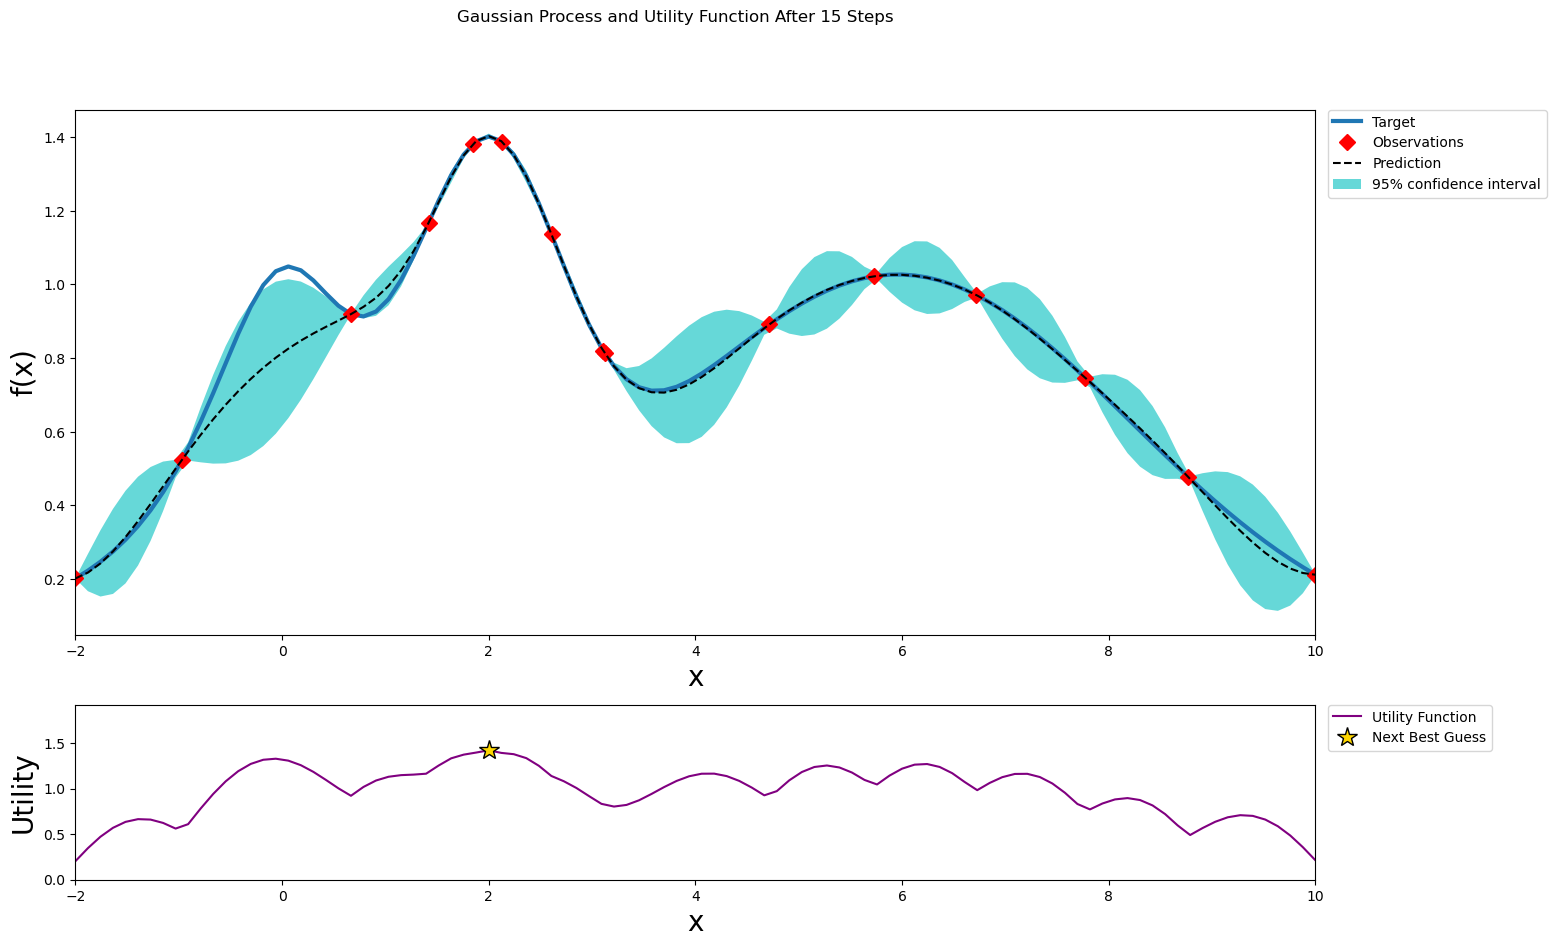

In [35]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
| 16        | 1.402     | 1.994     |


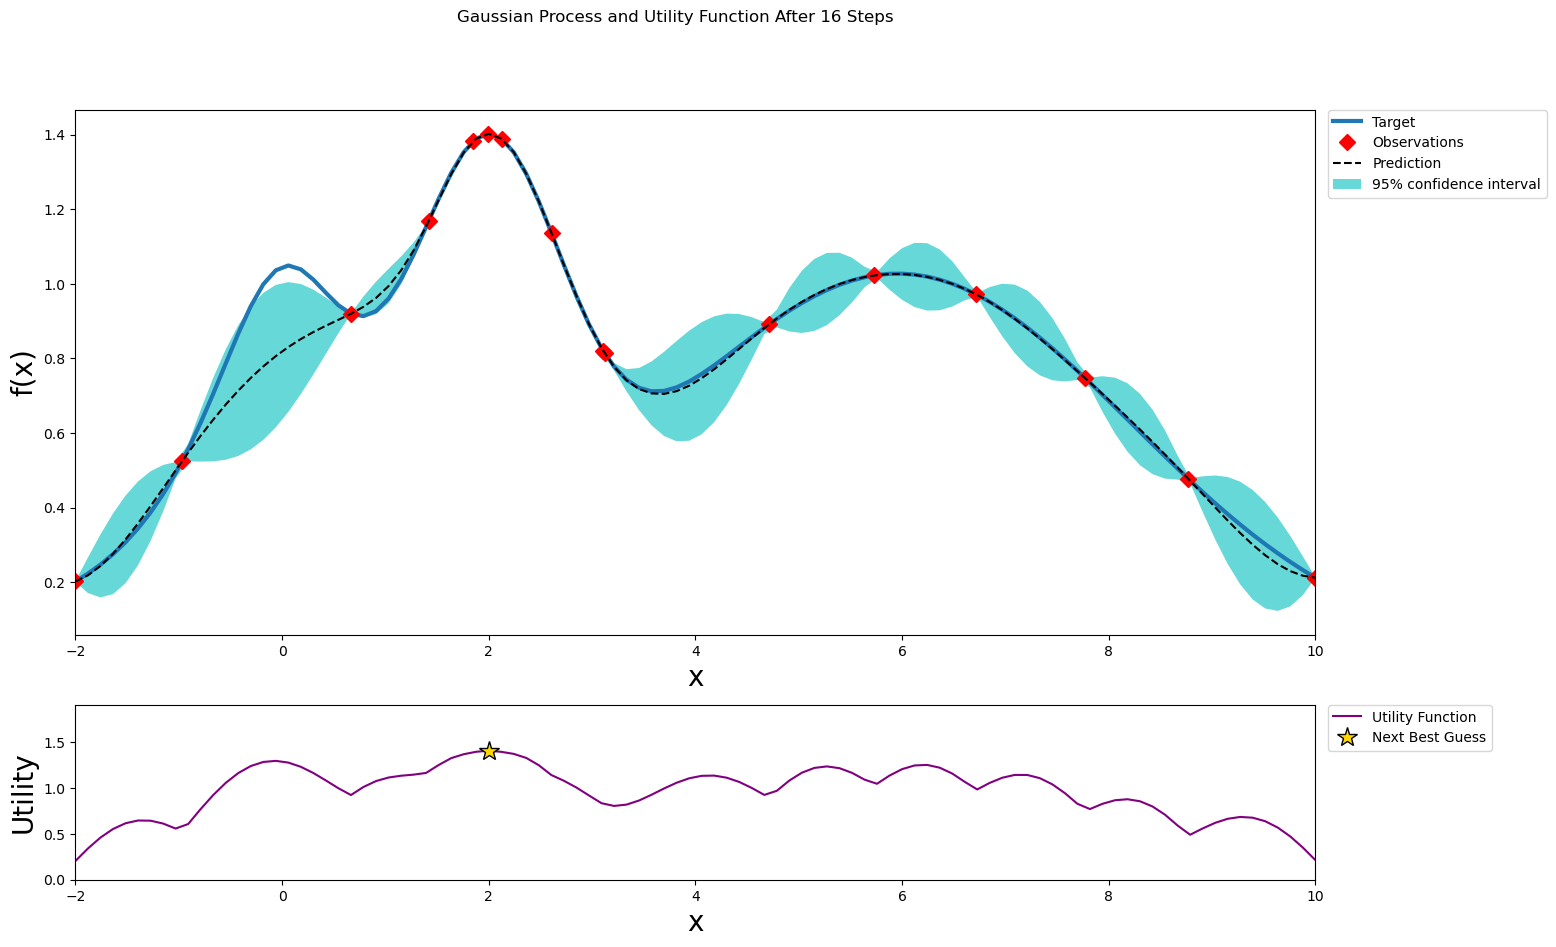

In [36]:
optimizer.maximize(init_points=0, n_iter=1, acquisition_function=acq_function)
plot_gp(optimizer, x, y)

In [69]:
print(bayes_optimizer.max)

{'target': 1.6912486061279255, 'params': {'x': 0.6744852561706762}}


In [71]:
for i, res in enumerate(bayes_optimizer.res):
    print("Iteration {}: \n\t{}".format(i,res))

Iteration 0: 
	{'target': 0.8386432644938401, 'params': {'x': 2.390508031418598}}
Iteration 1: 
	{'target': 0.6615151192509167, 'params': {'x': 3.721514930979356}}
Iteration 2: 
	{'target': 0.8388361864143722, 'params': {'x': 2.3907706277293386}}
Iteration 3: 
	{'target': 1.012207555102354, 'params': {'x': 2.655345593022801}}
Iteration 4: 
	{'target': 1.0976352625842445, 'params': {'x': 2.9107504332410215}}
Iteration 5: 
	{'target': 0.2004809927766792, 'params': {'x': -1.996998755836512}}
Iteration 6: 
	{'target': 0.02715043683111371, 'params': {'x': 6.0}}
Iteration 7: 
	{'target': 1.1843140905832197, 'params': {'x': 0.27699287335046313}}
Iteration 8: 
	{'target': 0.9391247291841318, 'params': {'x': 0.9804215788947502}}
Iteration 9: 
	{'target': 0.8257571614263416, 'params': {'x': -0.45938580298824355}}
Iteration 10: 
	{'target': 1.6372357491886176, 'params': {'x': 0.536395369627139}}
Iteration 11: 
	{'target': 0.09353420610112567, 'params': {'x': 4.72682807717886}}
Iteration 12: 
	{'t